# [Sckikit-learn](https://scikit-learn.org/stable/)

## 자주 사용하는 사이킷런 모듈

- 데이터 정제(Data Cleansing) & 속성 공학(Feature Engineering)
  - sklearn.preprocessing: 데이터 전처리(인코딩, 정규화 등)
  - sklearn.feature_selection: 특성 선택
  - sklearn.feature_extraction: 특성 추출(아미지나 텍스트에서 속성 추출)
- 모델 성능 평가와 개선
  - sklearn.model_selection: 데이터 분리, 하이퍼 파라미터 튜닝
  - sklearn.metrics: 성능평가
- 지도학습(Supervised Learning)
  - sklearn.ensemble: 앙상블 
  - sklearn.linear_model: 선형모델
  - sklearn.tree: 의사결정나무
- 비지도학습(Unsupervised Learning)
  - sklearn.cluster: 군집분석
  - sklearn.decomposition: 차원축소
- 유틸리티와 데이터 세트
  - sklearn.pipeline: 워크플로우 파이프라인
  - 예제 데이터 세트
- 사이킷런 알고리즘 명명규칙
  - 분류 알고리즘명: OOClassifier
  > ex) DecisionTreeClassifier
  - 회귀 알고리즘명: OORegressor
  > ex) DecisionTreeRegressor

# 머신러닝 워크플로우

## 데이터 수집(또는 데이터 로드)
- 유방암 데이터
> 총 30개의 속성과 malignant(악성), benign(양성)의 두가지 타겟값을 가지고 있다.

In [30]:
from sklearn.datasets import load_breast_cancer

# 데이터 로드
breast_cancer = load_breast_cancer()

In [31]:
dir(breast_cancer)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [32]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [33]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [34]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## 데이터 점검 및 탐색

In [35]:
import numpy as np 
import pandas as pd 

In [36]:
df_cancer = pd.DataFrame(breast_cancer.data,columns= breast_cancer.feature_names)
df_cancer['target'] = breast_cancer['target']
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [37]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [38]:
df_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## 전처리 및 정제

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [40]:
# standardization
scaler = StandardScaler()
scaled = scaler.fit_transform(df_cancer.drop('target', axis=1))

In [41]:
print(f'df_cancer.shape: {df_cancer.shape}')
print('-'*50)
print(f'scaled.shape: {scaled.shape}')

df_cancer.shape: (569, 31)
--------------------------------------------------
scaled.shape: (569, 30)


In [42]:
scaled[:1,:]

array([[ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
         3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
         2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
         1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
         1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
         2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461]])

In [43]:
scaled[5:7,:]

array([[-0.47637467, -0.8353353 , -0.38714807, -0.50565045,  2.23742148,
         1.24433549,  0.8663016 ,  0.82465565,  1.0054018 ,  1.89000504,
        -0.25507029, -0.59266165, -0.32130419, -0.28925822,  0.1563467 ,
         0.44554365,  0.1600252 , -0.06912355,  0.13411881,  0.48684584,
        -0.16549825, -0.31383633, -0.11500946, -0.24432021,  2.04851283,
         1.72161644,  1.2632432 ,  0.90588779,  1.75406939,  2.24180161],
       [ 1.17090767,  0.16064943,  1.13812505,  1.09529491, -0.12313623,
         0.08829524,  0.3000724 ,  0.64693511, -0.06432462, -0.76233215,
         0.14988307, -0.80493989,  0.15541029,  0.29862746, -0.90902983,
        -0.65156801, -0.31014139, -0.22808903, -0.82966608, -0.61121781,
         1.3689833 ,  0.32288289,  1.3683253 ,  1.27521954,  0.51864023,
         0.02121498,  0.50955225,  1.1967158 ,  0.26247566, -0.01473048]])

In [47]:
type(scaled)

numpy.ndarray

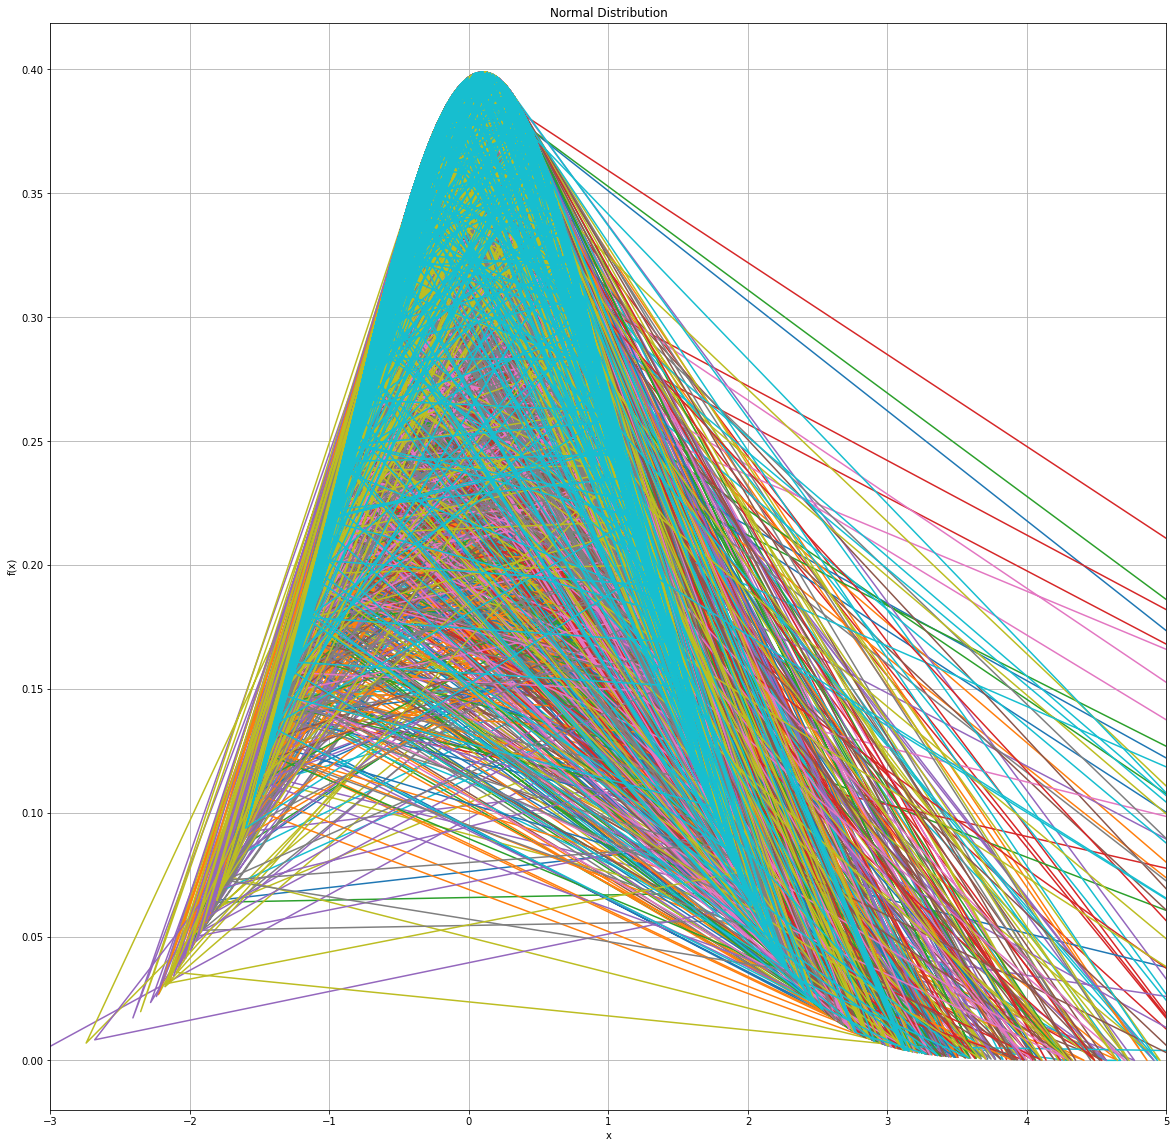

In [80]:
import matplotlib.pyplot as plt #1
import numpy as np #2
from scipy.stats import norm #3

# x = np.arange(0, 20, 0.1) #4
plt.figure(figsize=(20,20)) #5
plt.title('Normal Distribution') #6
plt.xlabel('x') #7
plt.ylabel('f(x)') #8
plt.xlim(-3, 5)
plt.grid() #9
plt.plot(scaled, norm.pdf(scaled, loc=0.1, scale=1)) #10
plt.show() #11

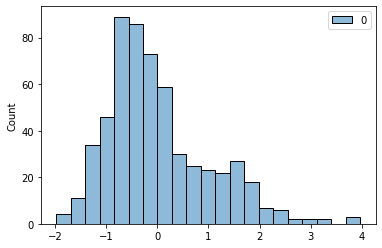

In [95]:
import seaborn as sns

sns.histplot(scaled[:,2:3])
plt.show()

In [45]:
import numpy as np
import matplotlib.pylot as plt

plt.plot(x, y)

SyntaxError: invalid syntax (<ipython-input-45-2bcbbf553f04>, line 1)

In [44]:
# train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(scaled, df_cancer['target'],  random_state=10)

## 모델링 및 훈련

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
# logistic regression
lr_clf = LogisticRegression()
# 훈련
lr_clf.fit(x_train, y_train)

LogisticRegression()

## 평가

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
# 예측
pred = lr_clf.predict(x_valid)
# 정확도 측정
accuracy_score(y_valid, pred)

0.958041958041958